In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv')

In [134]:

cacao.head(10)

,Bar id,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [135]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
Bar id                              1795 non-null int64
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 140.3+ KB


In [136]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [137]:
cacao.columns = ['bar_id', 'company','specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'bean_origin']

In [138]:
cacao.head(10)

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


1795


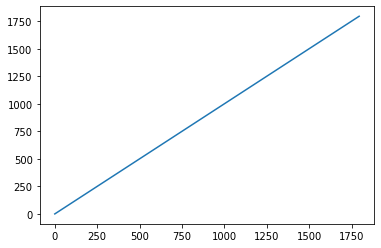

In [139]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [140]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

In [141]:
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
A. Morin,21
Valrhona,21
Arete,20
Hotel Chocolat (Coppeneur),18


In [142]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [143]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
Valrhona,21
A. Morin,21
Arete,20
Guittard,18
Hotel Chocolat (Coppeneur),18


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
company    1696 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


In [144]:
pd.DataFrame(cacao.specific_origin.value_counts())

,specific_origin
,58
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
Sambirano,18
Chuao,18
Ocumare,16
Papua New Guinea,15


In [145]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)

In [146]:
display(pd.DataFrame(cacao.specific_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['specific_origin']].info()

,specific_origin
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
Sambirano,18
Chuao,18
Ocumare,16
Ghana,15
Papua New Guinea,15


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
specific_origin    1737 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

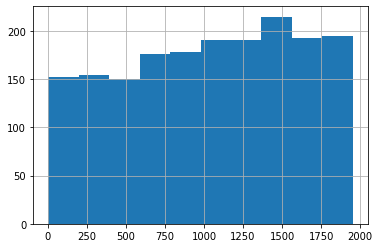

In [147]:
cacao.ref.hist()
cacao.ref.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

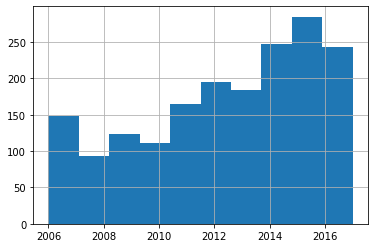

In [148]:
cacao.review_date.hist()
cacao.review_date.describe()

In [149]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
5        70%
6        70%
7        70%
8        70%
9        70%
10       70%
11       70%
12       70%
13       70%
14       70%
15       70%
16       70%
17       70%
18       70%
19       70%
20       63%
21       70%
22       63%
23       70%
24       70%
        ... 
1770     85%
1771     70%
1772     78%
1773     78%
1774     65%
1775     68%
1776     66%
1777     72%
1778     80%
1779     72%
1780     65%
1781     70%
1782     70%
1783     62%
1784     75%
1785    375%
1786     90%
1787     70%
1788     68%
1789     58%
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [150]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

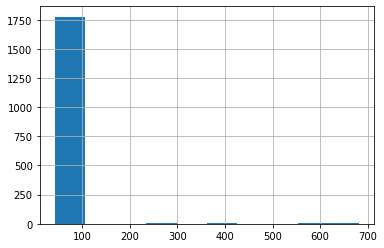

In [151]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


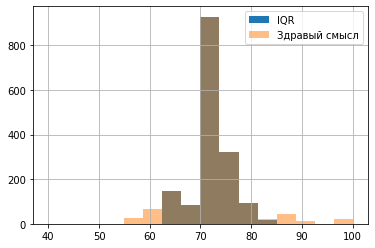

In [152]:
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

In [153]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]

In [154]:
cacao.company_location

0          France
1          France
3          France
4          France
5          France
6          France
7          France
8          France
9          France
10         France
11         France
12         France
13         France
14         France
15         France
16         France
17         France
18         France
19         France
20         France
21         France
22         France
23         U.S.A.
24         U.S.A.
25           Fiji
          ...    
1769      Austria
1770      Austria
1771      Austria
1772      Austria
1773    Australia
1774    Australia
1775    Australia
1776    Australia
1777    Australia
1778      Austria
1779      Austria
1780      Austria
1781      Austria
1782      Austria
1783      Austria
1784      Austria
1786      Austria
1787      Austria
1788      Austria
1789      Austria
1790      Austria
1791      Austria
1792      Austria
1793      Austria
1794      Austria
Name: company_location, Length: 1776, dtype: object

In [155]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
Ecuador,54
Australia,49
Belgium,39
Switzerland,38
Germany,35


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
company_location    1776 non-null object
dtypes: object(1)
memory usage: 27.8+ KB


In [156]:
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
6        3.50
7       11.50
8        3.75
9        4.00
10       2.75
11       3.00
12       3.25
13       3.75
14       2.75
15       3.00
16       3.25
17       4.00
18       3.25
19       3.50
20       4.00
21       3.50
22       3.75
23       3.75
24       3.75
25       2.75
        ...  
1769     2.75
1770     3.00
1771     3.50
1772     3.50
1773     3.75
1774     3.25
1775     3.50
1776     3.50
1777     3.75
1778     2.75
1779     3.50
1780     3.50
1781     3.00
1782     3.50
1783     3.75
1784     3.00
1786     3.25
1787     3.75
1788     3.25
1789     3.50
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

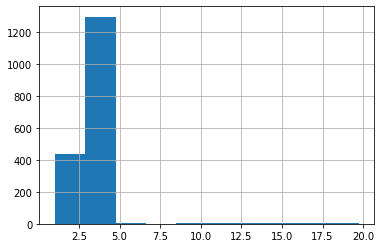

In [157]:
cacao.rating.hist()
cacao.rating.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


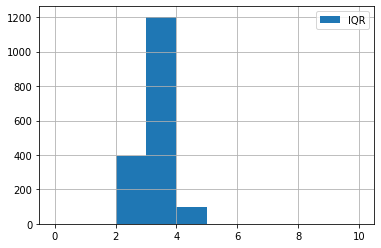

In [158]:
median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [159]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [160]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [161]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
bean_type    861 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


In [162]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [163]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Beniano,3
EET,3
Matina,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
bean_type    860 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


In [164]:
cacao.bean_origin = cacao.bean_origin.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [165]:
display(pd.DataFrame(cacao.bean_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_origin.nunique())
cacao.loc[:, ['bean_origin']].info()

,bean_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
Nicaragua,57
Brazil,57
Bolivia,53
Belize,49
Papua New Guinea,41


Значений, встретившихся в столбце более 10 раз: 25
Уникальных значений: 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
bean_origin    1631 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


In [166]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [167]:
cacao.bean_origin = cacao.bean_origin.apply(fix_countries).sort_values()

In [168]:
display(pd.DataFrame(cacao.bean_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.bean_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_origin.nunique())
cacao.loc[:, ['bean_origin']].info()

,bean_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
Nicaragua,57
Brazil,57
Bolivia,53
Belize,49
PapuaNewGuinea,41


Значений, упомянутых более 10 раз: 25
Уникальных значений: 93
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
bean_origin    1630 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


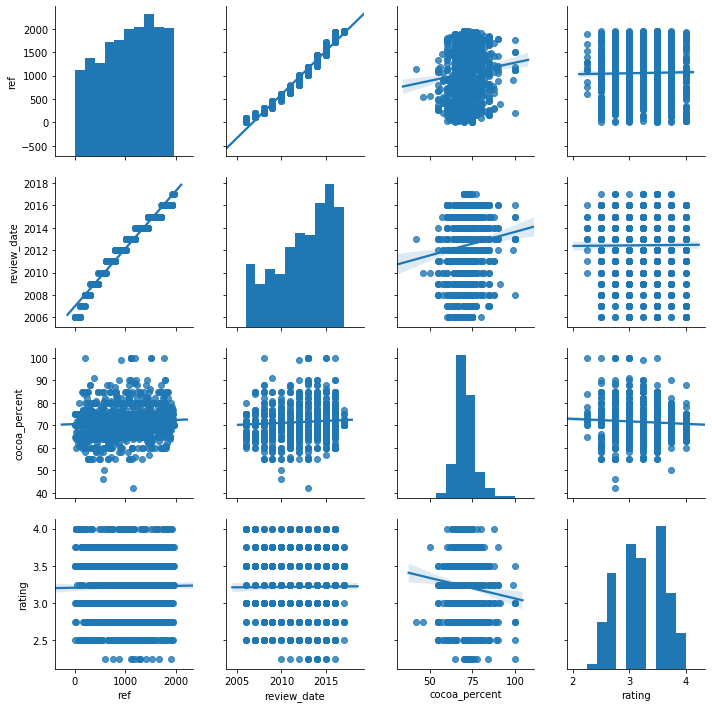

In [169]:
sns.pairplot(cacao, kind = 'reg')

In [170]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


In [171]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

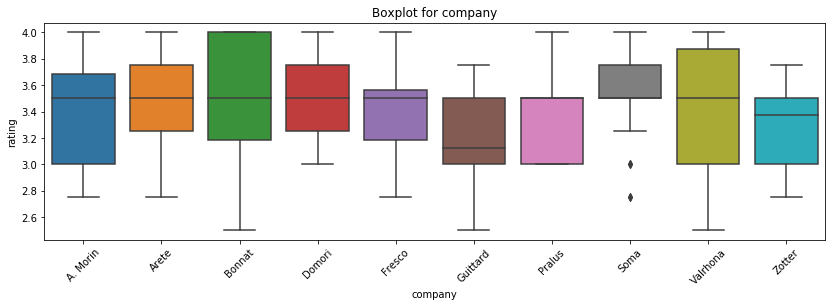

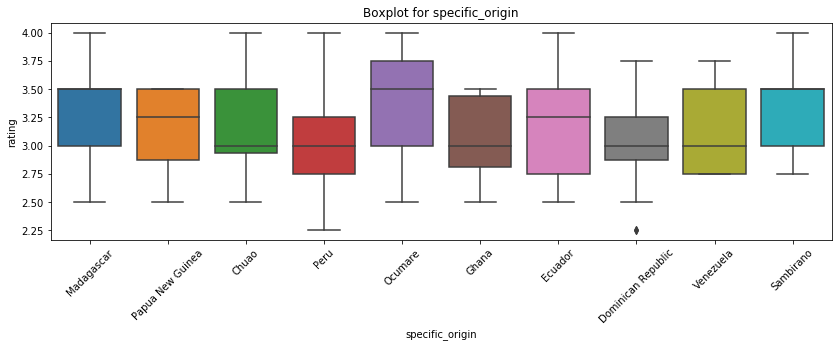

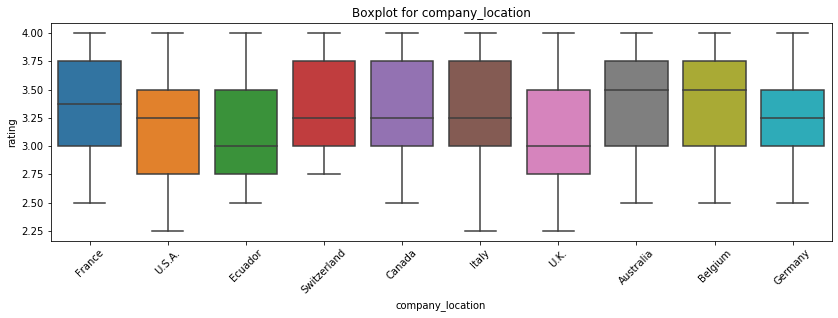

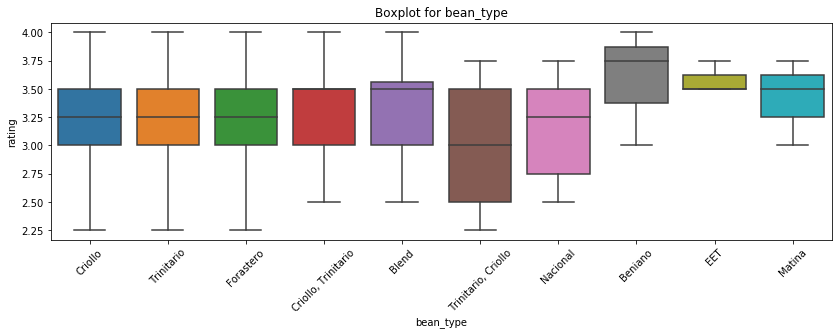

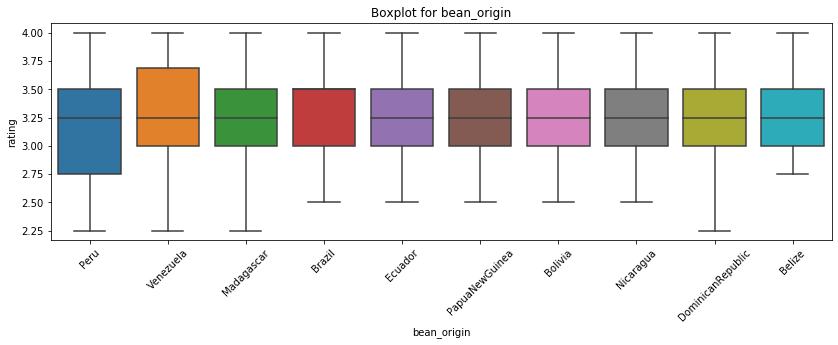

In [172]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'bean_origin']:
    get_boxplot(col)

In [173]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 9 columns):
company             1596 non-null object
specific_origin     1637 non-null object
ref                 1690 non-null int64
review_date         1690 non-null int64
cocoa_percent       1690 non-null float64
company_location    1690 non-null object
rating              1690 non-null float64
bean_type           860 non-null object
bean_origin         1630 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 212.0+ KB


In [110]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue <= 0.05/len(combinations_all): 
            # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [196]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    i = 0
    combinations_all = list(combinations(cols, 2))
    print(combinations_all)
    for comb in combinations_all:
        i+=1
        a = ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue
        b = 0.05/len(combinations_all)
        
        print('comb=', comb)
        print('i=', i)
        print('a=', a)
        #print(comb[0])
        #print(comb[1])
        if  a <= b: 
            # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [197]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'bean_origin']:
    get_stat_dif(col)

[('Soma', 'Bonnat'), ('Soma', 'Fresco'), ('Soma', 'Pralus'), ('Soma', 'Domori'), ('Soma', 'Valrhona'), ('Soma', 'Arete'), ('Soma', 'A. Morin'), ('Soma', 'Guittard'), ('Soma', 'Zotter'), ('Bonnat', 'Fresco'), ('Bonnat', 'Pralus'), ('Bonnat', 'Domori'), ('Bonnat', 'Valrhona'), ('Bonnat', 'Arete'), ('Bonnat', 'A. Morin'), ('Bonnat', 'Guittard'), ('Bonnat', 'Zotter'), ('Fresco', 'Pralus'), ('Fresco', 'Domori'), ('Fresco', 'Valrhona'), ('Fresco', 'Arete'), ('Fresco', 'A. Morin'), ('Fresco', 'Guittard'), ('Fresco', 'Zotter'), ('Pralus', 'Domori'), ('Pralus', 'Valrhona'), ('Pralus', 'Arete'), ('Pralus', 'A. Morin'), ('Pralus', 'Guittard'), ('Pralus', 'Zotter'), ('Domori', 'Valrhona'), ('Domori', 'Arete'), ('Domori', 'A. Morin'), ('Domori', 'Guittard'), ('Domori', 'Zotter'), ('Valrhona', 'Arete'), ('Valrhona', 'A. Morin'), ('Valrhona', 'Guittard'), ('Valrhona', 'Zotter'), ('Arete', 'A. Morin'), ('Arete', 'Guittard'), ('Arete', 'Zotter'), ('A. Morin', 'Guittard'), ('A. Morin', 'Zotter'), ('Guit

comb= ('Peru', 'Bolivia')
i= 22
a= 0.6648522633594652
comb= ('Peru', 'Belize')
i= 23
a= 0.31384313051154594
comb= ('Peru', 'PapuaNewGuinea')
i= 24
a= 0.09046130745630528
comb= ('Madagascar', 'DominicanRepublic')
i= 25
a= 0.23677936788263707
comb= ('Madagascar', 'Nicaragua')
i= 26
a= 0.4280830036534564
comb= ('Madagascar', 'Brazil')
i= 27
a= 0.5494335893310534
comb= ('Madagascar', 'Bolivia')
i= 28
a= 0.22454230637474823
comb= ('Madagascar', 'Belize')
i= 29
a= 0.5517452675900862
comb= ('Madagascar', 'PapuaNewGuinea')
i= 30
a= 0.7325052284147546
comb= ('DominicanRepublic', 'Nicaragua')
i= 31
a= 0.8860780982591875
comb= ('DominicanRepublic', 'Brazil')
i= 32
a= 0.12192768434223644
comb= ('DominicanRepublic', 'Bolivia')
i= 33
a= 0.7413730894131992
comb= ('DominicanRepublic', 'Belize')
i= 34
a= 0.7565439963808865
comb= ('DominicanRepublic', 'PapuaNewGuinea')
i= 35
a= 0.24867830543289213
comb= ('Nicaragua', 'Brazil')
i= 36
a= 0.19949672755215528
comb= ('Nicaragua', 'Bolivia')
i= 37
a= 0.671441

In [94]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0


In [183]:
cacao.loc[:, 'company'].value_counts().index[:]

Index(['Soma', 'Bonnat', 'Fresco', 'Pralus', 'Domori', 'Valrhona', 'Arete',
       'A. Morin', 'Guittard', 'Zotter',
       ...
       'Britarev', 'Grand Place', 'Lake Champlain (Callebaut)',
       'Chuao Chocolatier (Pralus)', 'Manifesto Cacao', 'Tsara (Cinagra)',
       'Fearless (AMMA)', 'Glennmade', 'Callebaut', 'Oakland Chocolate Co.'],
      dtype='object', length=395)

In [179]:
list(combinations(cacao.loc[:, 'company'].value_counts().index[:10], 2))

[('Soma', 'Bonnat'),
 ('Soma', 'Fresco'),
 ('Soma', 'Pralus'),
 ('Soma', 'Domori'),
 ('Soma', 'Valrhona'),
 ('Soma', 'Arete'),
 ('Soma', 'A. Morin'),
 ('Soma', 'Guittard'),
 ('Soma', 'Zotter'),
 ('Bonnat', 'Fresco'),
 ('Bonnat', 'Pralus'),
 ('Bonnat', 'Domori'),
 ('Bonnat', 'Valrhona'),
 ('Bonnat', 'Arete'),
 ('Bonnat', 'A. Morin'),
 ('Bonnat', 'Guittard'),
 ('Bonnat', 'Zotter'),
 ('Fresco', 'Pralus'),
 ('Fresco', 'Domori'),
 ('Fresco', 'Valrhona'),
 ('Fresco', 'Arete'),
 ('Fresco', 'A. Morin'),
 ('Fresco', 'Guittard'),
 ('Fresco', 'Zotter'),
 ('Pralus', 'Domori'),
 ('Pralus', 'Valrhona'),
 ('Pralus', 'Arete'),
 ('Pralus', 'A. Morin'),
 ('Pralus', 'Guittard'),
 ('Pralus', 'Zotter'),
 ('Domori', 'Valrhona'),
 ('Domori', 'Arete'),
 ('Domori', 'A. Morin'),
 ('Domori', 'Guittard'),
 ('Domori', 'Zotter'),
 ('Valrhona', 'Arete'),
 ('Valrhona', 'A. Morin'),
 ('Valrhona', 'Guittard'),
 ('Valrhona', 'Zotter'),
 ('Arete', 'A. Morin'),
 ('Arete', 'Guittard'),
 ('Arete', 'Zotter'),
 ('A. Morin', '

In [180]:
len(list(combinations(cacao.loc[:, 'cocoa_percent'].value_counts().index[:10], 2)))

45